# Import all DVH, calc mean DVH

In [1]:
import os
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyEclipseDVH import eclipse_DVH
from scipy import interpolate

In [2]:
files = os.listdir()   # return a list of files
AAA_files = [file for file in files if file.endswith('AAA.txt')]
AXB_files = [file for file in files if file.endswith('AXB.txt')]

In [3]:
# d = {value: foo(value) for value in sequence if bar(value)}
AAA_dict = {file.strip('.txt'): eclipse_DVH(file) for file in AAA_files}    # load all AAA DVH into dict

Case11_AAA.txt loaded 	 patID = Case11_AAA	 Prescription [Gy] = 55.000
Case12_AAA.txt loaded 	 patID = Case12_AAA	 Prescription [Gy] = 55.000
case13_AAA.txt loaded 	 patID = Case13_AAA	 Prescription [Gy] = 55.000
case14_AAA.txt loaded 	 patID = Case14_AAA	 Prescription [Gy] = 55.000
Case16_AAA.txt loaded 	 patID = Case16_AAA	 Prescription [Gy] = 55.000
Case17_AAA.txt loaded 	 patID = Case17_AAA	 Prescription [Gy] = 55.000
Case1_AAA.txt loaded 	 patID = Case1_AAA	 Prescription [Gy] = 55.000
Case22_AAA.txt loaded 	 patID = Case22_AAA	 Prescription [Gy] = 55.000
Case24_AAA.txt loaded 	 patID = Case24_AAA	 Prescription [Gy] = 55.000
Case5_AAA.txt loaded 	 patID = Case5_AAA	 Prescription [Gy] = 55.000


In [4]:
AAA_dict.keys()

dict_keys(['Case16_AAA', 'case13_AAA', 'Case22_AAA', 'Case1_AAA', 'Case17_AAA', 'Case12_AAA', 'Case24_AAA', 'Case11_AAA', 'case14_AAA', 'Case5_AAA'])

In [5]:
AAA_dict.get('Case22_AAA').DVH_df.columns  # get a single DVH structures

Index(['BODY', 'Foramen+3mm', 'L Brachial plex', 'Oesophagus', 'Heart',
       'Trachea', 'Airway avoidance', 'PTV CHEST', 'Lt_Lung', 'Foramen',
       'PTV ring 2-3cm', 'Rt_Lung', 'Bronchial tree', 'Both Lungs-ITV', 'skin',
       'PseudoPTV-ITV', 'ITV', 'Pseudo Ring', 'ribs', 'R Brachial plex',
       'Artefact', 'temp', 'Liver', 'Dose 50[%]', 'Dose 100[%]'],
      dtype='object')

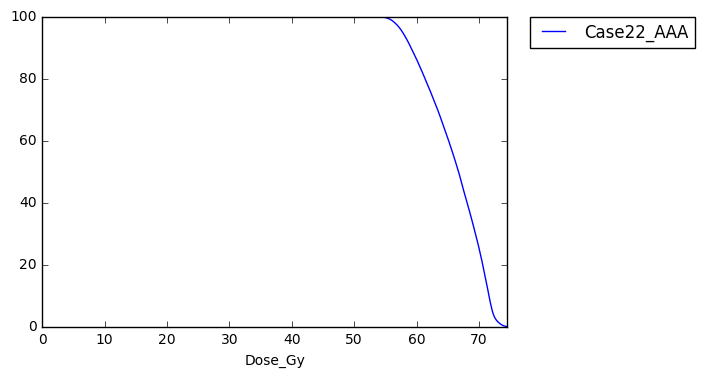

In [6]:
AAA_dict.get('Case22_AAA').DVH_df['PTV CHEST'].plot(label = 'Case22_AAA' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

,Case16_AAA,case13_AAA,Case22_AAA,Case1_AAA,Case17_AAA,Case12_AAA,Case24_AAA,Case11_AAA,case14_AAA,Case5_AAA
Dose_Gy,,,,,,,,,,
77.000,0.023727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77.055,0.022795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77.110,0.021864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77.165,0.020933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77.220,0.020002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


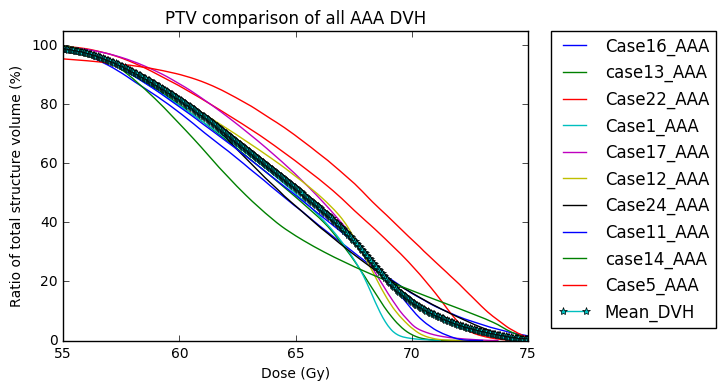

In [17]:
df = pd.DataFrame()  # create the empty df
for i, key in enumerate(AAA_dict.keys()):
    temp_DVH = AAA_dict.get(key).DVH_df['PTV CHEST']
    temp_DVH_df = pd.DataFrame({key : temp_DVH})
    if i == 0:
        df = temp_DVH_df  # create the dataframe
    else:       
        df = pd.concat([df, temp_DVH_df], axis=1)
    
    df = df.fillna(value=0)
    temp_DVH.plot(label = key)   # plot

df.mean(axis = 1).plot(marker = '*', label = 'Mean_DVH')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0,105])
plt.xlim([55,75])
plt.title('PTV comparison of all AAA DVH')
plt.xlabel('Dose (Gy)')
plt.ylabel('Ratio of total structure volume (%)')

df.tail()